In [1]:
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import arviz as az
import matplotlib.pyplot as plt

/Users/son520804/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [45]:
np.mean(stats.t(loc = 0,
                scale = 1,
                df = 1).rvs(500))

-11.818731256637122

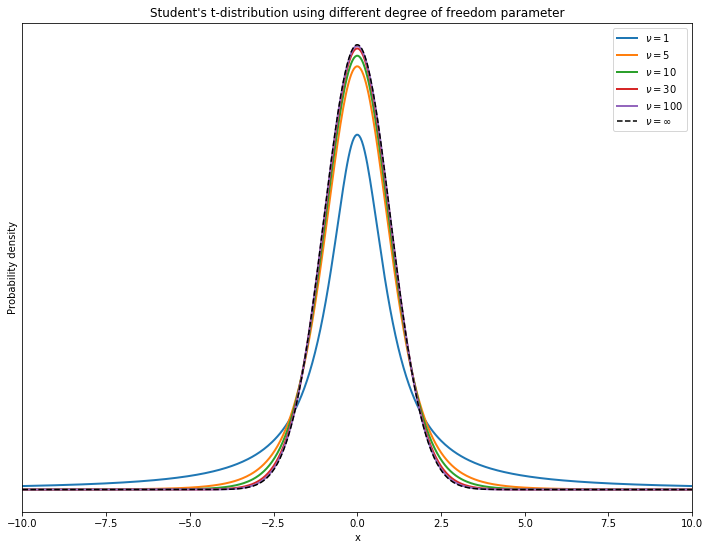

In [48]:
plt.figure(figsize=(12,9))
x_values = np.linspace(-10, 10, 500)
for df in [1, 5, 10, 30, 100]:
    distri = stats.t(df)
    x_pdf = distri.pdf(x_values)
    plt.plot(x_values, x_pdf, label=fr'$\nu = {df}$', lw = 2)

x_pdf = stats.norm.pdf(x_values)
plt.plot(x_values, x_pdf, 'k--', label = r'$\nu = \infty$')
plt.xlabel('x')
plt.ylabel('Probability density')
plt.title('Student\'s t-distribution using different degree of freedom parameter')
plt.yticks([])
plt.legend()
plt.xlim(-10, 10)
plt.show()

In [50]:
# Specify prior and model
data = np.loadtxt('chemical_shifts.csv')

with pm.Model() as model_t:
    mu = pm.Uniform('mu', 40, 60)
    sigma = pm.HalfNormal('sigma', sd = 5)
    nu = pm.Exponential('nu', 1/30)
    y = pm.StudentT('y', mu = mu, sd = sigma, nu = nu, observed = data)
    trace = pm.sample(3000, chains = 3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 2 jobs)
NUTS: [nu, sigma, mu]
Sampling 3 chains, 0 divergences: 100%|██████████| 10500/10500 [00:15<00:00, 696.91draws/s]


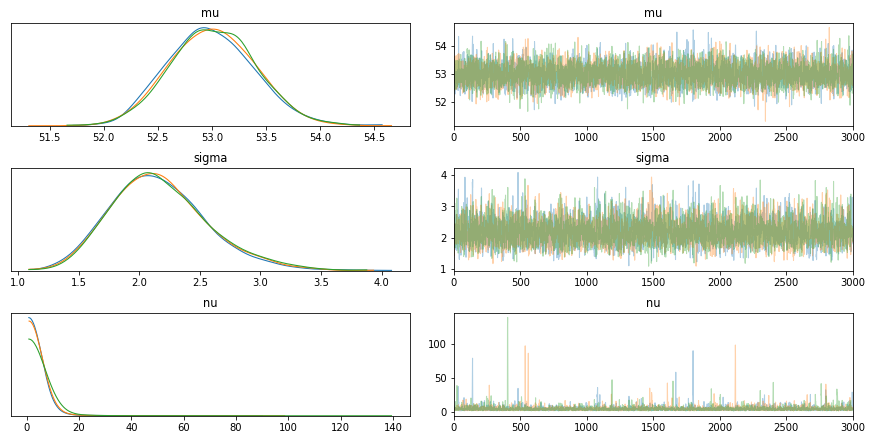

In [54]:
az.plot_trace(trace)
plt.show()

In [53]:
az.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,53.007,0.390,52.303,53.737,0.005,0.004,5391.0,5383.0,5446.0,5045.0,1.0
sigma,2.175,0.399,1.455,2.941,0.006,0.004,4348.0,4326.0,4355.0,4782.0,1.0
nu,4.648,4.878,1.161,9.356,0.087,0.062,3122.0,3122.0,4666.0,3987.0,1.0


/Users/son520804/anaconda3/lib/python3.6/site-packages/pymc3/sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 100/100 [00:00<00:00, 780.09it/s]
arviz.data.io_pymc3 - WARNING - posterior predictive variable y's shape not compatible with number of chains and draws. This can mean that some draws or even whole chains are not represented.


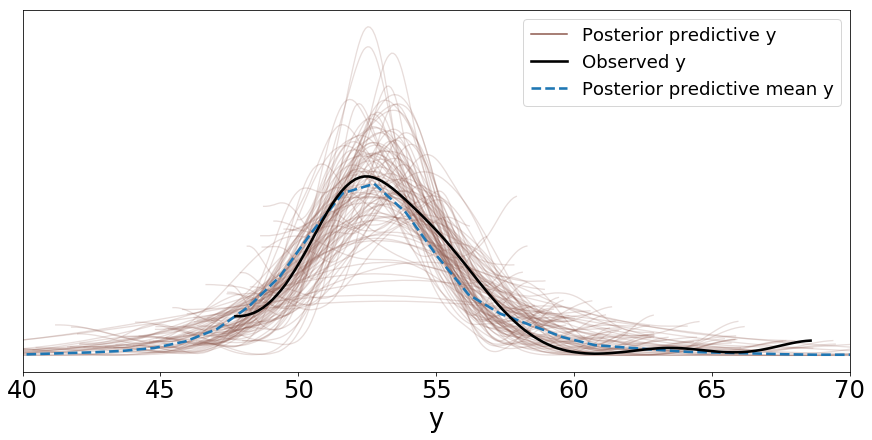

In [58]:
# Posterior predictive check

y_ppc_t = pm.sample_posterior_predictive(
    trace, 100, model_t, random_seed = 111)
y_pred_t = az.from_pymc3(trace = trace,
                         posterior_predictive = y_ppc_t)
az.plot_ppc(y_pred_t, figsize = (12, 6), mean = True)
plt.xlim(40,70)
#ax[0].legend(fontsize = 14)
plt.show()